In [1]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt
import plotly.graph_objs as go


In [2]:
df = pd.read_csv("C:/Users/PC1/Downloads/btceUSD_1-min_data_2012-01-01_to_2017-05-31.csv/btceUSD_1-min_data_2012-01-01_to_2017-05-31.csv")
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')
df.set_axis(df['Timestamp'], inplace=True)
df.head(10000)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,
2011-12-31 00:43:00,2011-12-31 00:43:00,4.247,4.247,4.247,4.247,0.4,1.6988,4.247
2011-12-31 00:44:00,2011-12-31 00:44:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 00:45:00,2011-12-31 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 00:46:00,2011-12-31 00:46:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 00:47:00,2011-12-31 00:47:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2012-01-06 23:18:00,2012-01-06 23:18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06 23:19:00,2012-01-06 23:19:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06 23:20:00,2012-01-06 23:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.drop(columns=['Volume_(BTC)', 'Volume_(Currency)'], inplace=True)

In [4]:
from scipy.interpolate import interp1d

In [5]:
df['Weighted_Price'] = df['Weighted_Price'].interpolate()# we will fill the null rows

In [6]:
df.head(8000)

,Timestamp,Open,High,Low,Close,Weighted_Price
Timestamp,,,,,,
2011-12-31 00:43:00,2011-12-31 00:43:00,4.247,4.247,4.247,4.247,4.247000
2011-12-31 00:44:00,2011-12-31 00:44:00,NaN,NaN,NaN,NaN,4.245935
2011-12-31 00:45:00,2011-12-31 00:45:00,NaN,NaN,NaN,NaN,4.244870
2011-12-31 00:46:00,2011-12-31 00:46:00,NaN,NaN,NaN,NaN,4.243804
2011-12-31 00:47:00,2011-12-31 00:47:00,NaN,NaN,NaN,NaN,4.242739
...,...,...,...,...,...,...
2012-01-05 13:58:00,2012-01-05 13:58:00,NaN,NaN,NaN,NaN,6.232588
2012-01-05 13:59:00,2012-01-05 13:59:00,NaN,NaN,NaN,NaN,6.232853
2012-01-05 14:00:00,2012-01-05 14:00:00,NaN,NaN,NaN,NaN,6.233118


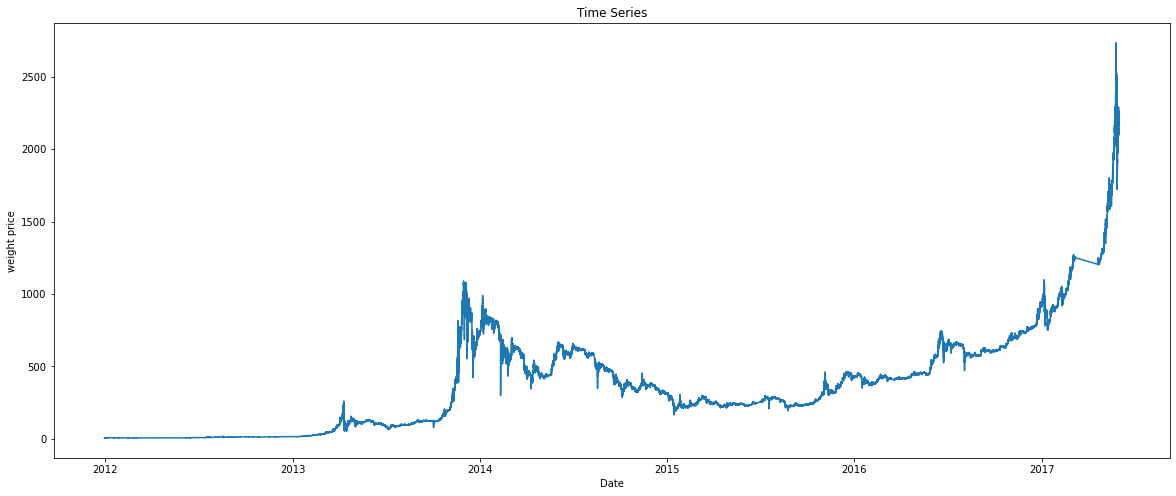

In [7]:
plt.figure(figsize=(20,8))
plt.plot((df['Timestamp'].values).reshape((-1)), (df['Weighted_Price'].values).reshape((-1)))
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('weight price')
plt.show()

In [8]:
w_data = df['Weighted_Price'].values
w_data = w_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(w_data))

w_train = w_data[:split]
w_test = w_data[split:]

date_train = df['Timestamp'][:split]
date_test = df['Timestamp'][split:]

print(len(w_train))
print(len(w_test))

2201275
550319


In [9]:
w_train

array([[  4.247     ],
       [  4.24593478],
       [  4.24486957],
       ...,
       [421.99971431],
       [421.95615987],
       [421.96303529]])

In [10]:
w_test

array([[ 421.955     ],
       [ 421.95684607],
       [ 421.955     ],
       ...,
       [2134.5792536 ],
       [2138.8519133 ],
       [2139.4025938 ]])

In [11]:
date_train.head(1000000000000)

Timestamp
2011-12-31 00:43:00   2011-12-31 00:43:00
2011-12-31 00:44:00   2011-12-31 00:44:00
2011-12-31 00:45:00   2011-12-31 00:45:00
2011-12-31 00:46:00   2011-12-31 00:46:00
2011-12-31 00:47:00   2011-12-31 00:47:00
                              ...        
2016-03-28 07:44:00   2016-03-28 07:44:00
2016-03-28 07:45:00   2016-03-28 07:45:00
2016-03-28 07:46:00   2016-03-28 07:46:00
2016-03-28 07:47:00   2016-03-28 07:47:00
2016-03-28 07:48:00   2016-03-28 07:48:00
Name: Timestamp, Length: 2201275, dtype: datetime64[ns]

In [12]:
date_test.head(1000000000000)

Timestamp
2016-03-28 07:49:00   2016-03-28 07:49:00
2016-03-28 07:50:00   2016-03-28 07:50:00
2016-03-28 07:51:00   2016-03-28 07:51:00
2016-03-28 07:52:00   2016-03-28 07:52:00
2016-03-28 07:53:00   2016-03-28 07:53:00
                              ...        
2017-05-30 23:56:00   2017-05-30 23:56:00
2017-05-30 23:57:00   2017-05-30 23:57:00
2017-05-30 23:58:00   2017-05-30 23:58:00
2017-05-30 23:59:00   2017-05-30 23:59:00
2017-05-31 00:00:00   2017-05-31 00:00:00
Name: Timestamp, Length: 550319, dtype: datetime64[ns]

In [13]:
look_back = 15

train_generator = TimeseriesGenerator(w_train, w_train, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(w_test, w_test, length=look_back, batch_size=1)

In [14]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(10,activation='relu',input_shape=(look_back,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [15]:
num_epochs = 25
model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

C:\Users\PC1\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
110063/110063 [==============================] - 453s 4ms/step - loss: 1257.1110
Epoch 2/25
110063/110063 [==============================] - 458s 4ms/step - loss: 3.6464
Epoch 3/25
110063/110063 [==============================] - 460s 4ms/step - loss: 1.9008
Epoch 4/25
110063/110063 [==============================] - 455s 4ms/step - loss: 1.4207
Epoch 5/25
110063/110063 [==============================] - 435s 4ms/step - loss: 1.2104
Epoch 6/25
110063/110063 [==============================] - 483s 4ms/step - loss: 0.9433
Epoch 7/25
110063/110063 [==============================] - 479s 4ms/step - loss: 0.9538
Epoch 8/25
110063/110063 [==============================] - 536s 5ms/step - loss: 3340.6472
Epoch 9/25
110063/110063 [==============================] - 554s 5ms/step - loss: 2.1623
Epoch 10/25
110063/110063 [==============================] - 442s 4ms/step - loss: 1.3785
Epoch 11/25
110063/110063 [==============================] - 426s 4ms/step - loss: 0.9651
Epoch 12/25
1

In [16]:
prediction = model.predict_generator(test_generator)

C:\Users\PC1\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


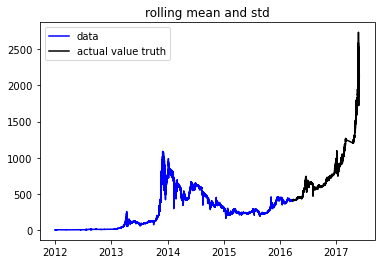

[ 421.191    421.85443  422.52176 ... 2131.9392  2134.259   2138.769  ]


In [19]:
orig = plt.plot(date_train, w_train, color = 'blue', label = 'data')
std = plt.plot(date_test, w_test, color = 'black', label = 'actual value truth')


plt.legend(loc = 'best')
plt.title('rolling mean and std')
plt.show(block = False)
w_train = w_train.reshape((-1))
w_test = w_test.reshape((-1))
prediction = prediction.reshape((-1))
print(prediction)

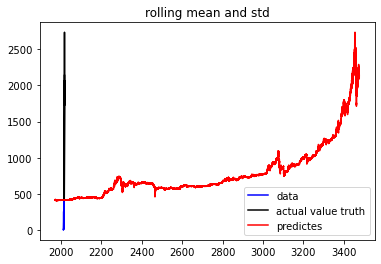

In [20]:

def predict(num_prediction, model):
    prediction_list = w_data[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]    
    return prediction_list

def predict_dates(num_prediction):
    last_date =  df['Timestamp'].values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

mean = plt.plot(prediction,color = 'red', label = 'predictes')

plt.legend(loc = 'best')
plt.title('rolling mean and std')
plt.show(block = False)
num_prediction = 30
forecast = predict(num_prediction, model)
forecast_dates = predict_dates(num_prediction)
